In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/r3_inframind/datasets/demand_prediction.csv')

In [ ]:
df.head()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,production_demand
0,Apr-90,482.34,236,1.83,"1,071.63",161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29,2042.410
1,May-90,447.26,234,1.89,"1,057.18",172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51,2017.645
2,Jun-90,440.99,216,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35,1933.885
3,Jul-90,418.44,205,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83,1902.150
4,Aug-90,418.44,198,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74,1928.605


In [ ]:
# #Separate dates for future plotting
# train_dates = pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,production_demand
0,Apr-90,482.34,236,1.83,"1,071.63",161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29,2042.410
1,May-90,447.26,234,1.89,"1,057.18",172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51,2017.645
2,Jun-90,440.99,216,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35,1933.885
3,Jul-90,418.44,205,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83,1902.150
4,Aug-90,418.44,198,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74,1928.605


In [ ]:
df

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,production_demand
0,Apr-90,482.34,236,1.83,"1,071.63",161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29,2042.410
1,May-90,447.26,234,1.89,"1,057.18",172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51,2017.645
2,Jun-90,440.99,216,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35,1933.885
3,Jul-90,418.44,205,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83,1902.150
4,Aug-90,418.44,198,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74,1928.605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Dec-19,NaN,NaN,1.67,NaN,272.80,NaN,NaN,500.37,1.66,NaN,NaN,875.00,825.750
357,Jan-20,NaN,NaN,1.74,NaN,272.40,NaN,NaN,499.64,1.68,NaN,NaN,875.00,825.230
358,Feb-20,NaN,NaN,1.69,NaN,270.56,NaN,NaN,496.28,1.61,NaN,NaN,875.00,822.570
359,Mar-20,NaN,NaN,1.49,NaN,276.93,NaN,NaN,507.96,1.50,NaN,NaN,875.00,831.440


In [ ]:
#Variables for training
cols = list(df)[1:25]
# columns 1,2,3,4,5 .. NOT 6
cols

['Coarse wool Price',
 'Copra Price',
 'Cotton Price',
 'Fine wool Price',
 'Hard log Price',
 'Hard sawnwood Price',
 'Hide Price',
 'Plywood Price',
 'Rubber Price',
 'Softlog Price',
 'Soft sawnwood Price',
 'Wood pulp Price',
 'production_demand']

In [ ]:
df = df.dropna()

In [ ]:
df = df.replace(',','', regex=True)


In [ ]:
df = df.replace('%','', regex=True)


In [ ]:
df

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,production_demand
0,Apr-90,482.34,236,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29,2042.410
1,May-90,447.26,234,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51,2017.645
2,Jun-90,440.99,216,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35,1933.885
3,Jul-90,418.44,205,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83,1902.150
4,Aug-90,418.44,198,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74,1928.605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Feb-17,1029.58,1146.25,1.88,1368.14,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.00,3186.160
323,Mar-17,1059.60,1016.00,1.91,1454.83,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.00,3183.660
324,Apr-17,991.12,1044.00,1.92,1404.98,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.00,3157.875
325,May-17,1019.95,1112.50,1.95,1433.47,265.28,704.52,69.36,486.59,2.10,159.84,306.60,875.00,3218.580


In [ ]:
df_for_training = df[cols].astype(float)
df_for_training.head()

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,production_demand
0,482.34,236.0,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29,2042.410
1,447.26,234.0,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51,2017.645
2,440.99,216.0,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35,1933.885
3,418.44,205.0,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83,1902.150
4,418.44,198.0,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74,1928.605


In [ ]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 2. We will make timesteps = 3. 
#With this, the resultant n_samples is 5 (as the input data has 9 rows).
trainX = []
trainY = []

In [ ]:
n_future = 1   # Number of days we want to predict into the future
n_past = 14     # Number of past days we want to use to predict the future

In [ ]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
trainX

array([[[-0.48129412, -1.11170232,  0.39218775, ..., -2.1226654 ,
          0.95295927, -0.53051078],
        [-0.59854782, -1.11928689,  0.50498053, ..., -2.29177   ,
          1.03660346, -0.57406839],
        [-0.61950508, -1.18754799,  0.6929685 , ..., -2.67342971,
          0.96599308, -0.72138862],
        ...,
        [-0.9963681 , -1.11170232,  0.44858414, ..., -2.33815634,
         -0.14757551, -1.2755016 ],
        [-0.87075824, -1.15720973,  0.39218775, ..., -2.39922189,
         -0.39325658, -1.25021831],
        [-0.85050289, -1.14962516,  0.37338895, ..., -2.34138577,
         -0.42482878, -1.12729316]],

       [[-0.59854782, -1.11928689,  0.50498053, ..., -2.29177   ,
          1.03660346, -0.57406839],
        [-0.61950508, -1.18754799,  0.6929685 , ..., -2.67342971,
          0.96599308, -0.72138862],
        [-0.69487769, -1.22926311,  0.73056609, ..., -2.3783774 ,
          0.76023598, -0.77720533],
        ...,
        [-0.87075824, -1.15720973,  0.39218775, ..., -

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (313, 14, 13).
trainY shape == (313, 1).


In [ ]:
# define Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 14, 64)            19968     
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 32,417
Trainable params: 32,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
18/18 [==============================] - 2s 31ms/step - loss: 0.5022 - val_loss: 0.6027
Epoch 2/10
18/18 [==============================] - 0s 14ms/step - loss: 0.1899 - val_loss: 0.4703
Epoch 3/10
18/18 [==============================] - 0s 15ms/step - loss: 0.1339 - val_loss: 0.5400
Epoch 4/10
18/18 [==============================] - 0s 15ms/step - loss: 0.1141 - val_loss: 0.4634
Epoch 5/10
18/18 [==============================] - 0s 16ms/step - loss: 0.0961 - val_loss: 0.5527
Epoch 6/10
18/18 [==============================] - 0s 14ms/step - loss: 0.0731 - val_loss: 0.5338
Epoch 7/10
18/18 [==============================] - 0s 15ms/step - loss: 0.0605 - val_loss: 0.4527
Epoch 8/10
18/18 [==============================] - 0s 14ms/step - loss: 0.0708 - val_loss: 0.6576
Epoch 9/10
18/18 [==============================] - 0s 14ms/step - loss: 0.0669 - val_loss: 0.4501
Epoch 10/10
18/18 [==============================] - 0s 15ms/step - loss: 0.0689 - val_loss: 0.4100


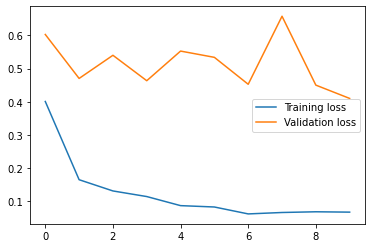

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
df.tail()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price,production_demand
322,Feb-17,1029.58,1146.25,1.88,1368.14,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.0,3186.160
323,Mar-17,1059.60,1016.00,1.91,1454.83,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.0,3183.660
324,Apr-17,991.12,1044.00,1.92,1404.98,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.0,3157.875
325,May-17,1019.95,1112.50,1.95,1433.47,265.28,704.52,69.36,486.59,2.10,159.84,306.60,875.0,3218.580
326,Jun-17,1065.81,1119.00,1.87,1403.83,268.39,697.44,67.59,492.29,1.72,159.84,306.60,875.0,3229.690


In [ ]:
#Forecasting...
#Start with the last day in training date and predict future...
n_future=6  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(start ='2-1-2017',  
         end ='7-1-2017', freq ='1M').tolist()

In [ ]:
forecast_period_dates

[Timestamp('2017-02-28 00:00:00', freq='M'),
 Timestamp('2017-03-31 00:00:00', freq='M'),
 Timestamp('2017-04-30 00:00:00', freq='M'),
 Timestamp('2017-05-31 00:00:00', freq='M'),
 Timestamp('2017-06-30 00:00:00', freq='M')]

In [ ]:
forecast = model.predict(trainX[-n_future:]) #forecast 

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [ ]:
y_pred_future

array([663.9674, 666.5754, 672.7109, 678.8337, 685.3485, 689.1541],
      dtype=float32)

In [ ]:
# save model
model.save('/content/drive/MyDrive/r3_inframind/models/production_demand.h5')